In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import bayes_mvs as bayesest 
import time

import PyEcoLib

from PyEcoLib.PopSimulator import PopSimulator
from PyEcoLib.simulator import Simulator
%matplotlib inline

In [2]:
meanbirthsize = 1 # micron 
doubling_time = 18 #min 
tmax = 7*doubling_time #min 
sample_time = 2 #min 
div_steps = 1
ncells = 100

In [3]:
gr = np.log(2)/doubling_time 

In [4]:
if not os.path.exists('./data'):
    os.makedirs('./data') #data path
if not os.path.exists('./figures'):
    os.makedirs('./figures') #Figures path

In [5]:
v0=meanbirthsize*np.ones(ncells)
sim = PopSimulator(ncells=ncells,gr = gr, sb=meanbirthsize, steps = div_steps,nu=2,V0array=v0) #Initializing the simulator

In [6]:
start = time.time()
sim.szdyn(tmax = tmax, sample_time = 0.1*doubling_time, FileName=  "./data/data2Pop.csv", DivEventsFile="./data/DivEvents2.csv")
print('It took', np.int(time.time()-start), 'seconds.')

It took 314 seconds.


In [ ]:
data1=pd.read_csv("./data/data2Pop.csv")
fig, ax = plt.subplots(1,1, figsize=(7,5))
smparr=data1.Sample.unique()
smparr.sort()
for smp in smparr:
    df=data1[data1.Sample==smp]
    tm,N=np.unique(df['Time'],return_counts=True)
    plt.plot(tm/doubling_time,N,c="#AAAAAA")
tm,N=np.unique(data1['Time'],return_counts=True)
plt.plot(tm/doubling_time,N/100,lw=3,c='k')
plt.yscale('log')
#plt.ylabel("$Population$",size=20)
plt.xlabel(r"$t/\tau$",size=20)
plt.xlabel(r"$t/\tau$",size=20)
plt.ylim([0,200])
plt.xlim([0,tmax/doubling_time])
taqui=np.arange(0,(tmax+1)/doubling_time,step=1)
plt.xticks(np.array(taqui))
taqui=2**np.arange(1,8,step=1)
plt.yticks(np.array(taqui))
plt.grid()
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for l in range(len(taqui)):
    plt.text(-.5,taqui[l],str(taqui[l]),fontsize=15)
plt.text(-1,20,'Population',fontsize=20,rotation=90)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.savefig('./figures/Population.eps',bbox_inches='tight')
plt.savefig('./figures/Population.png',bbox_inches='tight')

In [8]:
import random
def bootstrap(arr):
    mnar=np.empty(1000)
    for l in range(1000):
        mn=np.mean(random.choices(arr,k=len(arr)))
        mnar[l]=mn
    mn=np.median(mnar)
    up=np.quantile(mnar,0.95)
    down=np.quantile(mnar,0.05)
    return(mn,0.5*(-down+up))

In [9]:
import random
def bootstrapCV2(arr):
    mnar=np.empty(1000)
    for l in range(1000):
        v=random.choices(arr,k=len(arr))
        mn=np.var(v)/np.mean(v)**2
        mnar[l]=mn
    mn=np.median(mnar)
    up=np.quantile(mnar,0.95)
    down=np.quantile(mnar,0.05)
    return(mn,0.5*(-down+up))

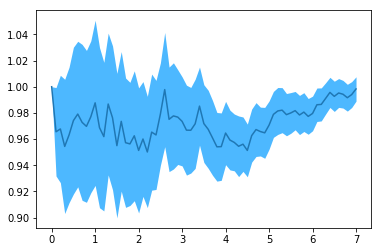

In [10]:
data1=pd.read_csv("./data/data2Pop.csv")

timearray1=data1.Time.unique()

mnszarray=[]
cvszarray=[]
errcv2sz=[]
errmnsz=[]

for t in timearray1:
    df=data1[data1.Time==t]
    szs=df.Size.values.tolist()
    mnszarray.append(bootstrap(szs)[0])
    errmnsz.append(bootstrap(szs)[1])
    cvszarray.append(bootstrapCV2(szs)[0])
    errcv2sz.append(bootstrapCV2(szs)[1])
plt.plot(timearray1/doubling_time,mnszarray)
plt.fill_between(np.array(timearray1)/doubling_time,np.array(mnszarray)-np.array(errmnsz),np.array(mnszarray)+np.array(errmnsz),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")

timearray2=data1.Time.unique()

mnsz2array=[]
cvszarray2=[]
errcv2sz2arr=[]
errmnsz2arr=[]

for t in timearray2:
    df=data1[data1.Time==t]
    mntemp=[]
    vartemp=[]
    meanerrmn=[]
    meanerrvar=[]
    smparray=df.Sample.unique()
    for s in smparray:
        dft=df[df.Sample==s]
        if len(dft)>1:
            conc=dft.Size.tolist()
            mntemp.append(np.mean(conc))
            vartemp.append(np.var(conc)/np.mean(conc)**2)

        else:
            conc=dft.Size
            mntemp.append(conc.tolist()[0])
            vartemp.append(0)
            meanerrmn.append(0)
            meanerrvar.append(0)
        
    mnsz2array.append(bootstrap(mntemp)[0])
    errmnsz2arr.append(bootstrap(mntemp)[1])
    cvszarray2.append(bootstrap(vartemp)[0])
    errcv2sz2arr.append(bootstrap(vartemp)[1])

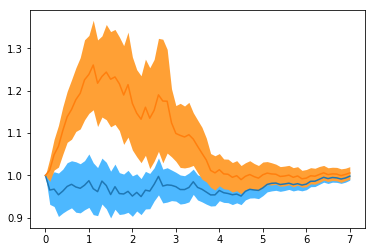

In [11]:
plt.plot(timearray2/doubling_time,mnszarray)
plt.fill_between(np.array(timearray1)/doubling_time,np.array(mnszarray)-np.array(errmnsz),np.array(mnszarray)+np.array(errmnsz),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
    
plt.plot(timearray2/doubling_time,mnsz2array)
plt.fill_between(np.array(timearray2)/doubling_time,np.array(mnsz2array)-np.array(errmnsz2arr),np.array(mnsz2array)+np.array(errmnsz2arr),
               alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0,label="SSA")

In [12]:
meanbirthsize = 1 # micron
doubling_time = 18 #min
tmax = 7*doubling_time #min
sample_time = 2 #min
div_steps = 1
ncells = 1000

In [13]:
v0=meanbirthsize*np.ones(ncells)
sim = PopSimulator(ncells=ncells,gr = gr, sb=meanbirthsize, steps = div_steps,nu=1,V0array=v0) #Initializing the simulator

In [14]:
start = time.time()
sim.szdyn(tmax = tmax, sample_time = 0.1*doubling_time, FileName=  "./data/dataPopMM.csv", DivEventsFile="./data/DivEventsMM.csv")
print('It took', np.int(time.time()-start), 'seconds.')

It took 28 seconds.


In [15]:
data1=pd.read_csv("./data/dataPopMM.csv")

timearrayMM=data1.Time.unique()

mnszarrayMM=[]
cvszarrayMM=[]
errcv2szMM=[]
errmnszMM=[]

for t in timearrayMM:
    df=data1[data1.Time==t]
    szs=df.Size.tolist()   
    mnszarrayMM.append(bootstrap(szs)[0])
    errmnszMM.append(bootstrap(szs)[1])
    cvszarrayMM.append(bootstrapCV2(szs)[0])
    errcv2szMM.append(bootstrapCV2(szs)[1])

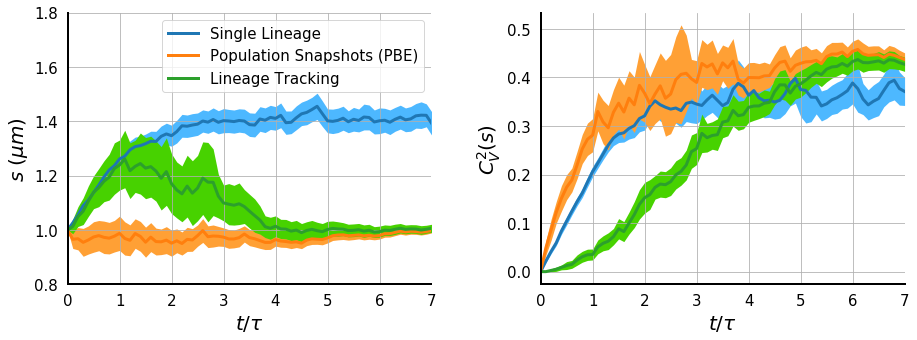

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(timearray2/doubling_time,mnszarrayMM,lw=3,label="Single Lineage")
ax[0].fill_between(np.array(timearray2)/doubling_time,np.array(mnszarrayMM)-np.array(errmnszMM),np.array(mnszarrayMM)+np.array(errmnszMM),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label='_nolegend_')
ax[0].plot(timearray2/doubling_time,mnszarray,lw=3,label='Population Snapshots (PBE)')
ax[0].fill_between(np.array(timearray1)/doubling_time,np.array(mnszarray)-np.array(errmnsz),np.array(mnszarray)+np.array(errmnsz),
                 alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0,label='_nolegend_')
    
ax[0].plot(timearray2/doubling_time,mnsz2array,lw=3,label='Lineage Tracking')
ax[0].fill_between(np.array(timearray2)/doubling_time,np.array(mnsz2array)-np.array(errmnsz2arr),np.array(mnsz2array)+np.array(errmnsz2arr),
                 alpha=1, edgecolor='#47D200', facecolor='#47D200',linewidth=0,label='_nolegend_')
ax[1].plot(timearray2/doubling_time, cvszarrayMM,lw=3)
ax[1].fill_between(np.array(timearray2)/doubling_time,np.array(cvszarrayMM)-np.array(errcv2szMM),np.array(cvszarrayMM)+np.array(errcv2szMM),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


ax[1].plot(timearray2/doubling_time, cvszarray,lw=3)
ax[1].fill_between(np.array(timearray2)/doubling_time,np.array(cvszarray)-np.array(errcv2sz),np.array(cvszarray)+np.array(errcv2sz),
                 alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0)

ax[1].plot(timearray2/doubling_time, cvszarray2,lw=3)
ax[1].fill_between(np.array(timearray2)/doubling_time,np.array(cvszarray2)-np.array(errcv2sz2arr),np.array(cvszarray2)+np.array(errcv2sz2arr),
                 alpha=1, edgecolor='#47D200', facecolor='#47D200',linewidth=0)

ax[0].set_ylabel("$s$ $(\mu m)$",size=20)
ax[1].set_ylabel("$C_V^2(s)$",size=20)
ax[0].set_xlabel(r"$t/\tau$",size=20)
ax[1].set_xlabel(r"$t/\tau$",size=20)
ax[0].legend(fontsize=15)
ax[0].set_ylim([0.8,1.8])
#ax[1].set_ylim([0,0.15])
for l in [0,1]:
    ax[l].set_xlim([0,7])
    taqui=np.arange(0,7.5,step=1)
    ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.savefig('./figures/size_population.eps',bbox_inches='tight')
plt.savefig('./figures/size_population.svg',bbox_inches='tight')

In [17]:
data=pd.read_csv("./data/DivEvents2.csv")

In [18]:
gr = np.log(2)/doubling_time 

In [19]:
mean_size=1.44*meanbirthsize
sampling_time = sample_time 
rprom = 10 # RNA mean concentration (RNA/um)
pprom = 1000 # prot mean concentration (RNA/um)
gammar = 5*gr # RNA Active degradation rate
kr = rprom*(gr+gammar) # RNA transcription rate
kp = pprom*gr/rprom # Protein translation rate

In [20]:
class Bacteria:
    def __init__(self, idx, V0, num_steps, gr, divpar, k,rna,prot):
        self.dp = divpar
        self.gr = gr
        self.idx = idx
        self.popidx = idx
        self.V = V0
        self.Vb = V0
        self.Vd = V0
        self.ndiv = 0
        self.rna = rna
        self.prot = prot
        self.k = k
        self.nextrb=0
        self.nextrd=0
        self.nextp=0
    def CalcTimeEvent(self,Nr,s):#estimating reaction times from propensity function  
        if Nr>0:
            self.nextrb=(1/gr)*np.log(1-(gr/(kr*s))*np.log(np.random.rand())) #time to thenext rna creation
            self.nextrd=-np.log(np.random.rand())/(gammar*Nr)
        elif Nr<=0:
            self.nextrb=(1/gr)*np.log(1-(gr/(kr*s))*np.log(np.random.rand())) #time to thenext rna creation
            self.nextrd=1000000

In [21]:
mnR=5
mnP=500
pop = []
df= data[data.BirthTime==0]
for m in range(len(df)):
    gr=df.iloc[m].GrowthRate
    sz=df.iloc[m].Sb
    dp=df.iloc[m].DivPar
    rna=mnR
    prot=mnP
    bct = Bacteria(idx=m, V0=sz, num_steps=div_steps, gr=gr, divpar=dp, k = gr,rna=rna,prot=prot)
    bct.CalcTimeEvent(rna,sz)
    pop.append(bct)
    
#-------------------------------------------------------------------------------    
    
t=0
tmax=6*doubling_time
data=data[data.BirthTime>0]
m=0
m=0
sample_time=0.1*doubling_time
tref=sample_time
GeneFile=open("./data/PopGene.csv","w")
output="Time,Sample,Cell,Nr,Np,Size\n"

nextdiv=data.iloc[m].BirthTime
popidx=data.iloc[m].Sample
idx=data.iloc[m].Cell
idx2=data.iloc[m+1].Cell
times=pd.DataFrame([[popidx,idx,nextdiv,0]],columns=['Sample','Cell','time','Type'])
for cell in pop:
    output+="0.00,"+str(cell.popidx)+","+str(cell.idx)+','+str(cell.rna)+','+str(cell.prot)+','+str(cell.V)+"\n"
    times=pd.concat([times,pd.DataFrame([[cell.popidx,cell.idx,cell.nextrb,1],\
                            [cell.popidx,cell.idx,cell.nextrd,2]],columns=['Sample','Cell','time','Type'])])
times.reset_index(drop=True)
GeneFile.write(output)

2108

In [ ]:
while m<len(data)-2 and t>=0:
    #print(t)
    nextt=np.min(times.time.tolist())
    
    if tref<nextt:
        dt=tref-t
        output=''
        for cell in pop:
            cell.V=cell.V*np.exp(cell.gr*dt)
            cell.prot+=kp*cell.rna*dt
            output+=str(tref)+','+str(int(cell.popidx))+','+str(int(cell.idx))+','+str(cell.rna)+','+str(cell.prot)+','+str(cell.V)+'\n'
        GeneFile.write(output)
        t=tref
        tref+=sample_time
        print(t)
    else:
        dt=nextt-t
        for cell in pop:
            cell.V=cell.V*np.exp(cell.gr*dt)
            cell.prot+=kp*cell.rna*dt
        t=nextt
        loc=np.argmin(times.time.tolist())
        if times.iloc[loc].Type==0:                
            df=data.iloc[m]
            idx=int(data.iloc[m].Mother)
            cell=pop[idx]
            cell.V=df.Sb
            Nr=cell.rna
            Np=cell.prot
            newnr=np.random.binomial(Nr,df.Sb/df.MotherSize)
            newnp=Np*df.Sb/df.MotherSize
            cell.rna=newnr
            cell.prot=newnp
            cell.CalcTimeEvent(newnr,cell.V)
            cell.gr=df.GrowthRate
            df=data.iloc[m+1]#The sister cell
            bct = Bacteria(idx=df.Cell, V0=df.Sb, num_steps=div_steps, gr=df.GrowthRate, divpar=df.DivPar, k = df.GrowthRate,\
                       rna=Nr-newnr,prot=Np-newnp)
            bct.popidx=cell.popidx
            bct.CalcTimeEvent(bct.rna,cell.V)
            pop.append(bct)
            times=pd.concat([times,pd.DataFrame([[bct.popidx,bct.idx,bct.nextrb+t,1],\
                            [bct.popidx,bct.idx,bct.nextrd+t,2]],columns=['Sample','Cell','time','Type'])])
            times.reset_index(drop=True)
            times.iloc[0]=[data.iloc[m+2].Sample,data.iloc[m+2].Cell,data.iloc[m+2].BirthTime,0]
            m+=2
        else:
            idx=int(times.iloc[loc].Cell)
            cell=pop[idx]
            if times.iloc[loc].Type==1:
                cell.rna+=1              
            elif times.iloc[loc].Type==2:
                cell.rna-=1
            cell.CalcTimeEvent(cell.rna,cell.V)
        if len(times[times.Cell==idx])==2:
            times.loc[times.Cell==idx,'time']=[cell.nextrb+t,cell.nextrd+t]
        else:
            times.loc[times.Cell==idx,'time']=[times.iloc[0].time,cell.nextrb+t,cell.nextrd+t]


GeneFile.close()

71.99999999999994
73.79999999999994
75.59999999999994
77.39999999999993
79.19999999999993
80.99999999999993
82.79999999999993
84.59999999999992
86.39999999999992
88.19999999999992
89.99999999999991
91.79999999999991


In [ ]:
data1=pd.read_csv("./data/PopGene.csv")

timearray=data1.Time.unique()

mnprotarray=[]
cvprotarray=[]
errcv2prot=[]
errmnprot=[]

for t in timearray:
    df=data1[data1.Time==t]
    szs=np.array(df.Np/df.Size)
    mean_cntr, var_cntr, std_cntr = bayesest(szs,alpha=0.95)
    mnprotarray.append(bootstrap(szs)[0])
    errmnprot.append(bootstrap(szs)[1])
    cvprotarray.append(bootstrapCV2(szs)[0])
    #errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2prot.append(bootstrapCV2(szs)[1])
plt.plot(timearray/doubling_time,mnprotarray)
plt.fill_between(np.array(timearray)/doubling_time,np.array(mnprotarray)-np.array(errmnprot),np.array(mnprotarray)+np.array(errmnprot),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")

In [ ]:
timearray=data1.Time.unique()

mnprotarray2=[]
cvprotarray2=[]
errcv2protarr2=[]
errmnprotarr2=[]

for t in timearray:
    df=data1[data1.Time==t]
    mntemp=[]
    meanerrmn=[]
    vartemp=[]
    meanerrvar=[]
    smparray=df.Sample.unique()
    for s in smparray:
        dft=df[df.Sample==s]
        if len(dft)>1:
            conc=np.array(dft.Np/dft.Size)
            mntemp.append(np.mean(conc))
            vartemp.append(np.var(conc)/np.mean(conc)**2)

        else:
            conc=dft.Np/dft.Size
            mntemp.append(conc.tolist()[0])
            vartemp.append(0)

            
    mnprotarray2.append(bootstrap(mntemp)[0])
    #mean_cntr, var_cntr, std_cntr = bayesest(mntemp,alpha=0.95)
    errmnprotarr2.append(bootstrap(mntemp)[1])
    cvprotarray2.append(bootstrap(vartemp)[0])
    #mean_cntr, var_cntr, std_cntr = bayesest(vartemp,alpha=0.95)
    errcv2protarr2.append(bootstrap(vartemp)[1])

plt.plot(timearray/doubling_time,mnprotarray)
#plt.fill_between(np.array(timearray)/doubling_time,np.array(mnprotarray)-np.array(errmnprot),np.array(mnprotarray)+np.array(errmnprot),
#                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
    
plt.plot(timearray/doubling_time,mnprotarray2)
#plt.fill_between(np.array(timearray)/doubling_time,np.array(mnprotarray2)-np.array(errmnprotarr2),np.array(mnprotarray2)+np.array(errmnprotarr2),
#                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")

In [ ]:
data=pd.read_csv("./data/DivEventsMM.csv")

In [ ]:
mean_size=1.44*meanbirthsize
sampling_time = sample_time 
rprom = 10 # RNA mean concentration (RNA/um)
pprom = 1000 # prot mean concentration (RNA/um)
gammar = 5*gr # RNA Active degradation rate
kr = rprom*(gr+gammar) # RNA transcription rate
kp = pprom*gr/rprom # Protein translation rate

In [ ]:
mnR=5
mnP=500
pop = []
df= data[data.BirthTime==0]
for m in range(len(df)):
    gr=df.iloc[m].GrowthRate
    sz=df.iloc[m].Sb
    dp=df.iloc[m].DivPar
    rna=mnR
    prot=mnP
    bct = Bacteria(idx=m, V0=sz, num_steps=div_steps, gr=gr, divpar=dp, k = gr,rna=rna,prot=prot)
    bct.CalcTimeEvent(rna,sz)
    pop.append(bct)
    
#-------------------------------------------------------------------------------    
    
t=0
tmax=7*doubling_time
data=data[data.BirthTime>0]
m=0
m=0
sample_time=0.1*doubling_time
tref=sample_time
GeneFile=open("./data/MMGene.csv","w")
output="Time,Sample,Cell,Nr,Np,Size\n"

nextdiv=data.iloc[m].BirthTime
popidx=data.iloc[m].Sample
idx=data.iloc[m].Cell
idx2=data.iloc[m+1].Cell
times=pd.DataFrame([[popidx,idx,nextdiv,0]],columns=['Sample','Cell','time','Type'])
for cell in pop:
    output+="0.00,"+str(cell.popidx)+","+str(cell.idx)+','+str(cell.rna)+','+str(cell.prot)+','+str(cell.V)+"\n"
    times=pd.concat([times,pd.DataFrame([[cell.popidx,cell.idx,cell.nextrb,1],\
                            [cell.popidx,cell.idx,cell.nextrd,2]],\
                                         columns=['Sample','Cell','time','Type'])])
times.reset_index(drop=True)
GeneFile.write(output)

In [ ]:
start=time.time()
while m<len(data)-1 and t>=0:
    #print(t)
    nextt=np.min(times.time.tolist())
    if tref<nextt:
        dt=tref-t
        output=''
        for cell in pop:
            cell.V=cell.V*np.exp(cell.gr*dt)
            cell.prot+=kp*cell.rna*dt
            output+=str(tref)+','+str(int(cell.popidx))+','+str(int(cell.idx))+','+str(cell.rna)+','+str(cell.prot)+','+str(cell.V)+'\n'
        GeneFile.write(output)
        t=tref
        tref+=sample_time
        print(t)
    else:
        dt=nextt-t
        for cell in pop:
            cell.V=cell.V*np.exp(cell.gr*dt)
            cell.prot+=kp*cell.rna*dt
        t=nextt
        loc=np.argmin(times.time.tolist())
        if times.iloc[loc].Type==0:                
            df=data.iloc[m]
            idx=int(data.iloc[m].Mother)
            cell=pop[idx]
            cell.V=df.Sb
            Nr=cell.rna
            newnr=np.random.binomial(Nr,df.Sb/df.MotherSize)
            newnp=cell.prot*df.Sb/df.MotherSize
            cell.rna=newnr
            cell.prot=newnp
            cell.CalcTimeEvent(newnr,cell.V)
            cell.gr=df.GrowthRate
            m+=1
            times.iloc[0]=[data.iloc[m].Sample,data.iloc[m].Cell,data.iloc[m].BirthTime,0]
        else:
            idx=int(times.iloc[loc].Cell)
            cell=pop[idx]
            if times.iloc[loc].Type==1:
                cell.rna+=1              
            elif times.iloc[loc].Type==2:
                cell.rna-=1
            cell.CalcTimeEvent(cell.rna,cell.V)
        if len(times[times.Cell==idx])==2:
            times.loc[times.Cell==idx,'time']=[cell.nextrb+t,cell.nextrd+t]
        else:
            times.loc[times.Cell==idx,'time']=[times.iloc[0].time,cell.nextrb+t,cell.nextrd+t]


GeneFile.close()
print('It took', np.int(time.time()-start), 'seconds.')

In [ ]:

data1=pd.read_csv("./data/MMGene.csv")

timearrayMM=data1.Time.unique()

mnprotarrayMM=[]
cvprotarrayMM=[]
errcv2protMM=[]
errmnprotMM=[]

for t in timearrayMM:
    df=data1[data1.Time==t]
    prots=np.array(df.Np/df.Size)
    mnprotarrayMM.append(np.mean(prots))
    errmnprotMM.append(bootstrap(prots)[1])
    cvprotarrayMM.append(bootstrapCV2(prots)[0])
    #errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2protMM.append(bootstrapCV2(prots)[1])


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(timearrayMM/doubling_time,mnprotarrayMM,lw=3,label="Single Lineage")
ax[0].fill_between(np.array(timearrayMM)/doubling_time,np.array(mnprotarrayMM)-np.array(errmnprotMM),np.array(mnprotarrayMM)+np.array(errmnprotMM),
               alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label='_nolegend_')
ax[0].plot(timearrayMM/doubling_time,mnprotarray,lw=3,label="Population Snapshots")
ax[0].fill_between(np.array(timearrayMM)/doubling_time,np.array(mnprotarray)-np.array(errmnprot),np.array(mnprotarray)+np.array(errmnprot),
                alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0,label='_nolegend_')
    
ax[0].plot(timearrayMM/doubling_time,mnprotarray2,lw=3,label="Lineage Tracking")
ax[0].fill_between(np.array(timearrayMM)/doubling_time,np.array(mnprotarray2)-np.array(errmnprotarr2),np.array(mnprotarray2)+np.array(errmnprotarr2),
                 alpha=1, edgecolor='#47D200', facecolor='#47D200',linewidth=0,label='_nolegend_')


ax[1].plot(timearrayMM/doubling_time,cvprotarrayMM,lw=3)

#ax[1].plot(timearrayMM/doubling_time,cvprotarray,lw=3)
ax[1].fill_between(np.array(timearray)/doubling_time,np.array(cvprotarray)-np.array(errcv2prot),np.array(cvprotarray)+np.array(errcv2prot),
                 alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0,label="SSA")
ax[1].plot(timearrayMM/doubling_time,cvprotarray,lw=3)

ax[1].fill_between(np.array(timearrayMM)/doubling_time,np.array(cvprotarrayMM)-np.array(errcv2protMM),np.array(cvprotarrayMM)+np.array(errcv2protMM),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
ax[1].plot(timearray/doubling_time,cvprotarray2,lw=3,c="#319000")
ax[1].fill_between(np.array(timearray)/doubling_time,np.array(cvprotarray2)-np.array(errcv2protarr2),np.array(cvprotarray2)+np.array(errcv2protarr2),
                 alpha=1,  edgecolor='#47D200', facecolor='#47D200',linewidth=0,label="SSA")
ax[0].legend(fontsize=15)

ax[0].set_ylabel("$p$",size=20)
ax[1].set_ylabel("$C_V^2(p)$",size=20)
ax[0].set_xlabel(r"$t/\tau$",size=20)
ax[1].set_xlabel(r"$t/\tau$",size=20)
#ax[0].set_ylim([1,1.7])
#ax[1].set_ylim([0,0.15])
for l in [0,1]:
    ax[l].set_xlim([0,7])
    taqui=np.arange(0,7.5,step=1)
    ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.savefig('./figures/Gene_population.eps',bbox_inches='tight')
plt.savefig('./figures/Gene_population.svg',bbox_inches='tight')

In [ ]:
data1=pd.read_csv("./data/PopGene.csv")

timearray=data1.Time.unique()

mnrnaarray=[]
cvrnaarray=[]
errcv2rna=[]
errmnrna=[]

for t in timearray:
    df=data1[data1.Time==t]
    szs=np.array(df.Nr/df.Size)
    mnrnaarray.append(bootstrap(szs)[0])
    errmnrna.append(bootstrap(szs)[1])
    cvrnaarray.append(bootstrapCV2(szs)[0])
    errcv2rna.append(bootstrapCV2(szs)[1])
plt.plot(timearray/doubling_time,mnrnaarray)
plt.fill_between(np.array(timearray)/doubling_time,np.array(mnrnaarray)-np.array(errmnrna),np.array(mnrnaarray)+np.array(errmnrna),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")

In [ ]:
timearray=data1.Time.unique()

mnrnaarray2=[]
cvrnaarray2=[]
errcv2rnaarr2=[]
errmnrnaarr2=[]

for t in timearray:
    df=data1[data1.Time==t]
    mntemp=[]
    meanerrmn=[]
    vartemp=[]
    meanerrvar=[]
    smparray=df.Sample.unique()
    for s in smparray:
        dft=df[df.Sample==s]
        if len(dft)>1:
            conc=np.array(dft.Nr/dft.Size)
            mntemp.append(np.mean(conc))
            vartemp.append(np.var(conc)/np.mean(conc)**2)
        else:
            conc=dft.Nr/dft.Size
            mntemp.append(conc.tolist()[0])
            vartemp.append(0)
            
    mnrnaarray2.append(bootstrap(mntemp)[0])
    #mean_cntr, var_cntr, std_cntr = bayesest(mntemp,alpha=0.95)
    errmnrnaarr2.append(bootstrap(mntemp)[1])
    cvrnaarray2.append(bootstrap(vartemp)[0])
    #mean_cntr, var_cntr, std_cntr = bayesest(vartemp,alpha=0.95)
    errcv2rnaarr2.append(bootstrap(vartemp)[1])

plt.plot(timearray/doubling_time,mnrnaarray)
#plt.fill_between(np.array(timearray)/doubling_time,np.array(mnrnaarray)-np.array(errmnrna),np.array(mnrnaarray)+np.array(errmnrna),
#                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
    
plt.plot(timearray/doubling_time,mnrnaarray2)
#plt.fill_between(np.array(timearray)/doubling_time,np.array(mnrnaarray2)-np.array(errmnrnaarr2),np.array(mnrnaarray2)+np.array(errmnrnaarr2),
#                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")

In [ ]:

plt.plot(timearrayMM/doubling_time,mnrnaarray,lw=3,label="Population Snapshots")
#ax[0].fill_between(np.array(timearray1)/doubling_time,np.array(mnrnaarray)-np.array(errmnrna),np.array(mnrnaarray)+np.array(errmnrna),
 #                alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
    
plt.plot(timearrayMM/doubling_time,mnrnaarray2,lw=3,label="Mean Population")
#ax[0].fill_between(np.array(timearray1)/doubling_time,np.array(mnrnaarray2)-np.array(errmnrnaarr2),np.array(mnrnaarray2)+np.array(errmnrnaarr2),
#                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")

In [ ]:

data1=pd.read_csv("./data/MMGene.csv")

timearrayMM=data1.Time.unique()

mnrnaarrayMM=[]
cvrnaarrayMM=[]
errcv2rnaMM=[]
errmnrnaMM=[]

for t in timearrayMM:
    df=data1[data1.Time==t]
    rnas=np.array(df.Nr/df.Size)
    mean_cntr, var_cntr, std_cntr = bayesest(rnas,alpha=0.95)
    mnrnaarrayMM.append(bootstrap(rnas)[0])
    errmnrnaMM.append(bootstrap(rnas)[1])
    cvrnaarrayMM.append(bootstrapCV2(rnas)[0])
    #errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2rnaMM.append(bootstrapCV2(rnas)[1])


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(timearrayMM/doubling_time,mnrnaarrayMM,lw=3,label="Single Lineage")
ax[0].fill_between(np.array(timearrayMM)/doubling_time,np.array(mnrnaarrayMM)-np.array(errmnrnaMM),np.array(mnrnaarrayMM)+np.array(errmnrnaMM),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label='_nolegend_')
ax[0].plot(timearrayMM/doubling_time,mnrnaarray,lw=3,label="Population Snapshots")
ax[0].fill_between(np.array(timearrayMM)/doubling_time,np.array(mnrnaarray)-np.array(errmnrna),np.array(mnrnaarray)+np.array(errmnrna),
                alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0,label='_nolegend_')
    
ax[0].plot(timearrayMM/doubling_time,mnrnaarray2,lw=3,c="#319000",label="Lineage Tracking")
ax[0].fill_between(np.array(timearrayMM)/doubling_time,np.array(mnrnaarray2)-np.array(errmnrnaarr2),np.array(mnrnaarray2)+np.array(errmnrnaarr2),
                 alpha=1, edgecolor='#00C917', facecolor='#00C917',linewidth=0,label='_nolegend_')


ax[1].plot(timearrayMM/doubling_time,cvrnaarrayMM,lw=3)
ax[1].fill_between(np.array(timearray)/doubling_time,np.array(cvrnaarray)-np.array(errcv2rna),np.array(cvrnaarray)+np.array(errcv2rna),
                 alpha=1, edgecolor='#FFA035', facecolor='#FFA035',linewidth=0,label="SSA")
ax[1].plot(timearrayMM/doubling_time,cvrnaarray,lw=3,c='#FF6800')
ax[1].fill_between(np.array(timearrayMM)/doubling_time,np.array(cvrnaarrayMM)-np.array(errcv2rnaMM),np.array(cvrnaarrayMM)+np.array(errcv2rnaMM),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
ax[1].plot(timearray/doubling_time,cvrnaarray2,lw=3,c="#319000")
ax[1].fill_between(np.array(timearray)/doubling_time,np.array(cvrnaarray2)-np.array(errcv2rnaarr2),np.array(cvrnaarray2)+np.array(errcv2rnaarr2),
                 alpha=1, edgecolor='#00C917', facecolor='#00C917',linewidth=0,label="SSA")
ax[0].legend(fontsize=15)

ax[0].set_ylabel(r"$\langle r\rangle$",size=20)
ax[1].set_ylabel("$C_V^2(r)$",size=20)
ax[0].set_xlabel(r"$t/\tau$",size=20)
ax[1].set_xlabel(r"$t/\tau$",size=20)
#ax[0].set_ylim([1,1.7])
#ax[1].set_ylim([0,0.15])
for l in [0,1]:
    ax[l].set_xlim([0,7])
    taqui=np.arange(0,7.5,step=1)
    ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.savefig('./figures/RNA_population.eps',bbox_inches='tight')
plt.savefig('./figures/RNA_population.svg',bbox_inches='tight')

In [ ]:
GeneFile=open("./data/GeneStatistics.csv","w")
output="Time,Type,MeanSz,ErrorMeanSz,CV2Sz,ErrorCV2Sz,MeanProt,ErrorMeanProt,CV2Prot,ErrorCV2Prot,MeanRNA,ErrorMeanRNA,CV2RNA,ErrorCV2RNA\n"
for l in range(len(timearrayMM)):
    output+=str(timearrayMM[l])+',Single Lineage,'+str(mnszarrayMM[l])+','+str(errmnszMM[l])+','+str(cvszarrayMM[l])\
    +','+str(errcv2szMM[l])+','+str(mnprotarrayMM[l])+','+str(errmnprotMM[l])+','+str(cvprotarrayMM[l])+','+str(errcv2protMM[l])\
    +','+str(mnrnaarrayMM[l])+','+str(errmnrnaMM[l])+','+str(cvrnaarrayMM[l])+','+str(errcv2rnaMM[l])+'\n'
for l in range(len(timearray)):
    output+=str(timearray[l])+',Population Snapshots,'+str(mnszarray[l])+','+str(errmnsz[l])+','+str(cvszarray[l])\
    +','+str(errcv2sz[l])+','+str(mnprotarray[l])+','+str(errmnprot[l])+','+str(cvprotarray[l])+','+str(errcv2prot[l])\
    +','+str(mnrnaarray[l])+','+str(errmnrna[l])+','+str(cvrnaarray[l])+','+str(errcv2rna[l])+'\n'
for l in range(len(timearray)):
    output+=str(timearray[l])+',Lineage Tracking,'+str(mnsz2array[l])+','+str(errmnsz2arr[l])+','+str(cvszarray2[l])\
    +','+str(errcv2sz2arr[l])+','+str(mnprotarray2[l])+','+str(errmnprotarr2[l])+','+str(cvprotarray2[l])+','+str(errcv2protarr2[l])\
    +','+str(mnrnaarray2[l])+','+str(errmnrnaarr2[l])+','+str(cvrnaarray2[l])+','+str(errcv2rnaarr2[l])+'\n'
GeneFile.write(output)
GeneFile.close() 